In [1]:
import pandas as pd

In [9]:
df=pd.read_excel("Dataset.xlsx")
df

,Supernova,Redshift,Distance Modulus,Distance Modulus Error,Unnamed: 4
0,1993ah,0.028488,35.346583,0.223906,0.128419
1,1993ag,0.050043,36.682368,0.166829,0.128419
2,1993o,0.052926,36.817691,0.155756,0.128419
3,1993b,0.070086,37.446737,0.158467,0.128419
4,1992bs,0.062668,37.483409,0.156099,0.128419
...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015
576,D-006,1.315000,44.971358,0.187509,0.551672
577,P-009,0.821000,43.640939,0.194014,0.551672
578,R-012,1.215000,45.246521,0.560317,0.000148


In [12]:
z=df["Redshift"]
z

0      0.028488
1      0.050043
2      0.052926
3      0.070086
4      0.062668
         ...   
575    1.017000
576    1.315000
577    0.821000
578    1.215000
579    0.623000
Name: Redshift, Length: 580, dtype: float64

In [76]:
Distance_modulus=df["Distance Modulus"]
Distance_modulus

0      35.346583
1      36.682368
2      36.817691
3      37.446737
4      37.483409
         ...    
575    44.293971
576    44.971358
577    43.640939
578    45.246521
579    42.514524
Name: Distance Modulus, Length: 580, dtype: float64

In [109]:
Modulo=10**((Distance_modulus-25)/5)
Modulo

0        117.305042
1        217.006920
2        230.960787
3        308.565458
4        313.820905
           ...     
575     7224.273081
576     9868.963776
577     5347.955161
578    11202.222383
579     3183.499599
Name: Distance Modulus, Length: 580, dtype: float64

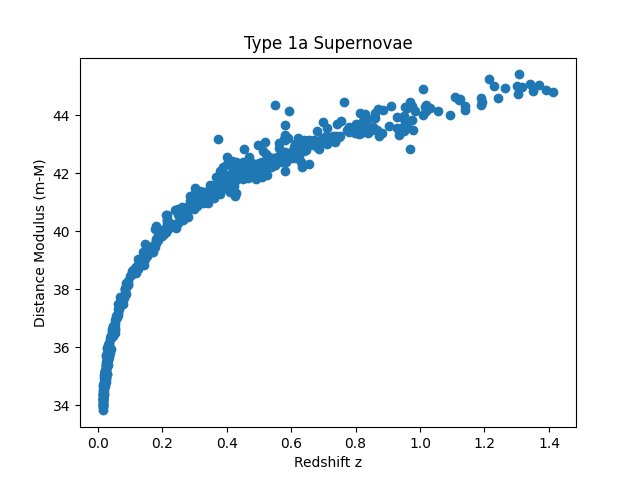

In [110]:
import matplotlib.pyplot as plt
#agregamos un control interactivo a la gráfica
%matplotlib widget
from matplotlib.colors import LogNorm

import numpy as np 
from scipy.integrate import quad



plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus (m-M)")
plt.scatter(z,Distance_modulus)






plt.show()

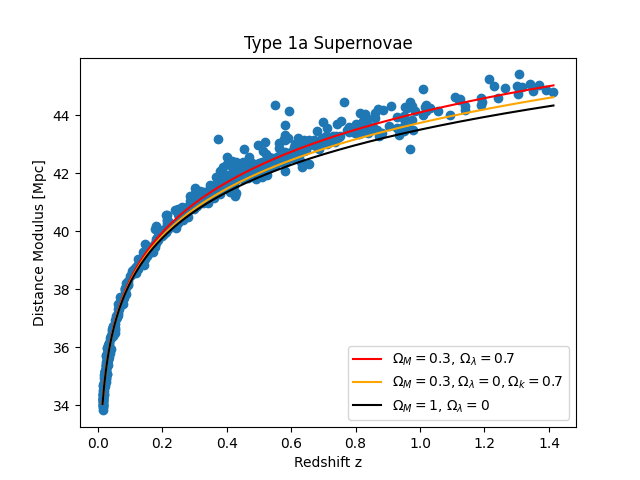

In [130]:
import matplotlib.pyplot as plt
#agregamos control interactivo a la gráfica
%matplotlib widget
import numpy as np 
from scipy.integrate import quad



plt.figure()
from matplotlib.colors import LogNorm
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus [Mpc]")
plt.scatter(z, Distance_modulus)

def distance_modulus_teórica(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda +(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    result= ((300000)/ H0)*(1+z) * integral
    return 5*np.log10(result)+25

#El factor de 25 proviene de las unidades en pc's. Considerando:m-M=5log(d/10pc)+5, se pasa a Mpc y sale el 25
#No tiene que ver con el fenómeno de extinsión.


#Primera Curva
# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values= np.array([distance_modulus_teórica(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values])
plt.plot(Z_values, distance_modulus_values, label=r'$\Omega_M=0.3$, $\Omega_{\lambda}=0.7$', color='red')
plt.legend()


#Segunda Curva

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70 
omega_M_value = 0.3
omega_lambda_value2 =0

#Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values2 = np.array([distance_modulus_teórica(z, H0_value, omega_M_value, omega_lambda_value2) for z in Z_values])
plt.plot(Z_values, distance_modulus_values2, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0, \Omega_k=0.7$', color='orange')
plt.legend()


#Tercera Curva
# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  
omega_M_value3 = 1
omega_lambda_value2 =0

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values3 = np.array([distance_modulus_teórica(z, H0_value, omega_M_value3, omega_lambda_value2) for z in Z_values])
plt.plot(Z_values, distance_modulus_values3, label=r'$\Omega_M=1$, $\Omega_{\lambda}=0$', color='black')
plt.legend()


plt.show()

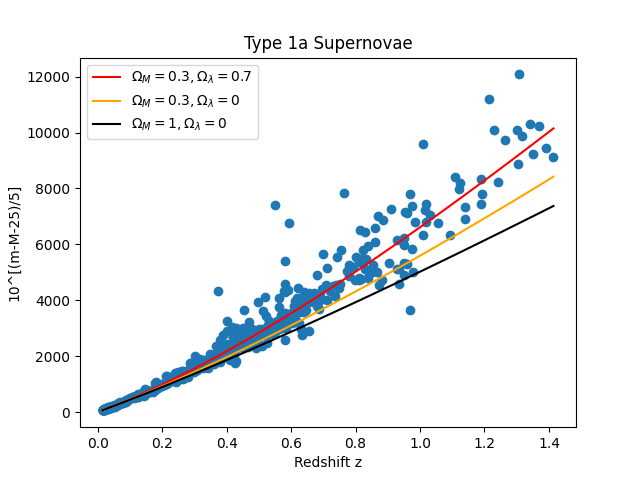

In [112]:
plt.figure()
from matplotlib.colors import LogNorm
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("10^[(m-M-25)/5]")
plt.scatter(z,Modulo)

def luminosity_distance(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda +(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    return ((300000)/ H0)*(1+z)*integral

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7

#Primera curva

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data1 = np.array(z)  # Ejemplo de valores de z
Z_values1 = np.linspace(min(Z_data1), max(Z_data1), 580)  # Valores de z para graficar la función ajustada
luminosity_values1 = np.array([luminosity_distance(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values1])
plt.plot(Z_values1, luminosity_values1, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0.7$', color='red')
plt.legend()



#Segunda curva

# Valores constantes para H0, omega_M y omega_lambda

omega_M_value= 0.3
omega_lambda_value2 = 0

# Ploteando la función ajustada (luminosidad en función de z)
luminosity_values2 = np.array([luminosity_distance(z, H0_value, omega_M_value, omega_lambda_value2) for z in Z_values1])
plt.plot(Z_values1, luminosity_values2, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0$', color='orange')
plt.legend()





#Tercera curva

# Valores constantes para H0, omega_M y omega_lambda

omega_M_value3= 1
omega_lambda_value2 = 0

# Ploteamos la función ajustada (luminosidad en función de z)
luminosity_values3 = np.array([luminosity_distance(z, H0_value, omega_M_value3, omega_lambda_value2) for z in Z_values1])
plt.plot(Z_values1, luminosity_values3, label=r'$\Omega_M=1, \Omega_{\lambda}=0$', color='black')
plt.legend()



plt.show()

### Teóricamente se tiene que 

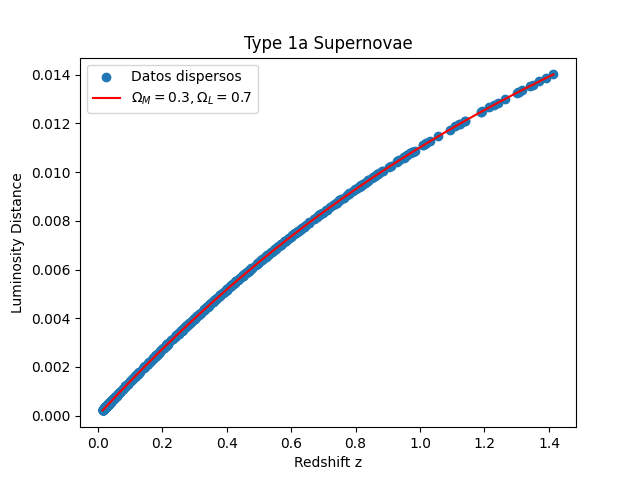

In [121]:
import numpy as np
from scipy.integrate import quad

def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1 / np.sqrt(omega_M * (1 + z)**3 + omega_lambda)
    integral, _ = quad(integrand, 0, z)
    return (1/ H0) * integral


# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7


Z_data = np.array(z)  # Ejemplo de valores de z
luminosity_distance_data = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_data])



#Ploteamos los datos y la función ajustada
plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Luminosity Distance")
plt.scatter(Z_data, luminosity_distance_data, label='Datos dispersos')

#Ploteamos la función ajustada (luminosidad en función de z)
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada

'''Z_values = np.linspace(0, 1, 580)  # Valores de z para graficar la función ajustada '''

luminosity_values = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values])
plt.plot(Z_values, luminosity_values, label=r'$\Omega_M=0.3, \Omega_L=0.7$', color='red')

plt.legend()
plt.show()


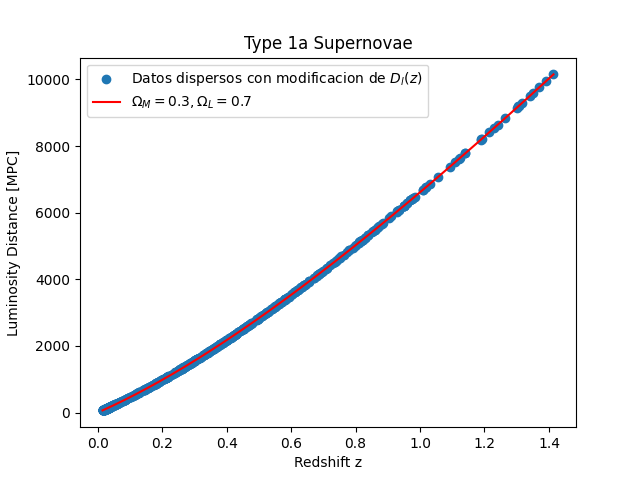

In [122]:
import numpy as np
from scipy.integrate import quad
'''
def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1 / np.sqrt(omega_M * (1 + z)**3 + omega_lambda)
    integral, _ = quad(integrand, 0, z)
    return (1/ H0) * integral

'''

def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda+(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    return ((300000)/ H0)*(1+z)* integral

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7


Z_data3 = np.array(z)  # Ejemplo de valores de z
luminosity_distance_data = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_data])



# Ploteamos los datos y la función ajustada
plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Luminosity Distance [MPC]")

# Ploteamos los datos dispersos
plt.scatter(Z_data, luminosity_distance_data, label=r'Datos dispersos con modificacion de $D_l(z)$')

# Ploteamos la función ajustada (luminosidad en función de z)
Z_values3 = np.linspace(min(Z_data3), max(Z_data3), 580)  # Valores de z para graficar la función ajustada
luminosity_values = np.array([luminosity_distance2(Z, H0_value, omega_M_value, omega_lambda_value) for Z in Z_values3])
plt.plot(Z_values3, luminosity_values, label=r'$\Omega_M=0.3, \Omega_L=0.7$', color='red')

plt.legend()
plt.show()


### Cálculo de la Chi cuadrada para $\Omega_M=0.3$; $\Omega_{\lambda}=0.7$ y $\Omega_k=0$

In [143]:
Error=df["Distance Modulus Error"]

In [145]:
Distance_modulus_error=np.array(Error)
Distance_modulus_error

array([0.22390593, 0.16682885, 0.15575591, 0.15846693, 0.15609943,
       0.18774568, 0.15563566, 0.19933718, 0.16717404, 0.16498125,
       0.17017495, 0.18469122, 0.16733348, 0.17551084, 0.15977086,
       0.19131227, 0.16230382, 0.17329544, 0.14291293, 0.14869411,
       0.08875066, 0.1024385 , 0.1070412 , 0.10849979, 0.17254762,
       0.18166271, 0.21523934, 0.17118699, 0.16029927, 0.18754476,
       0.16426869, 0.16788525, 0.20496507, 0.20946467, 0.17636469,
       0.23244938, 0.25089656, 0.2314796 , 0.21762859, 0.24063382,
       0.27165064, 0.22536249, 0.2346982 , 0.24838513, 0.22170026,
       0.30988981, 0.22242642, 0.24821601, 0.22436855, 0.2511775 ,
       0.16145286, 0.08609535, 0.08414412, 0.09910053, 0.11161425,
       0.15677749, 0.12944495, 0.0872168 , 0.20625667, 0.1836893 ,
       0.17231734, 0.21507123, 0.23901137, 0.22111537, 0.1717422 ,
       0.2155085 , 0.1802167 , 0.18996068, 0.2079597 , 0.19352392,
       0.17674739, 0.18012445, 0.24147486, 0.21156247, 0.17902

In [131]:
distance_modulus_values #Teórica

array([34.06553799, 34.39382322, 34.67989195, 34.93347369, 35.16127846,
       35.36812994, 35.55761231, 35.73246167, 35.89481409, 36.04636925,
       36.18850171, 36.32233891, 36.44881708, 36.56872216, 36.68272036,
       36.7913813 , 36.89519583, 36.9945899 , 37.08993556, 37.18155964,
       37.26975083, 37.35476539, 37.43683182, 37.51615473, 37.59291807,
       37.66728783, 37.73941428, 37.80943391, 37.87747106, 37.94363935,
       38.00804281, 38.07077702, 38.13192992, 38.19158265, 38.24981023,
       38.30668214, 38.36226288, 38.41661241, 38.46978659, 38.52183751,
       38.57281386, 38.62276122, 38.67172228, 38.71973712, 38.76684339,
       38.81307653, 38.85846992, 38.90305503, 38.9468616 , 38.98991773,
       39.03224999, 39.07388358, 39.11484236, 39.15514901, 39.19482503,
       39.23389089, 39.27236606, 39.31026907, 39.34761759, 39.38442848,
       39.42071782, 39.45650095, 39.49179258, 39.52660674, 39.56095687,
       39.59485585, 39.62831601, 39.66134917, 39.69396669, 39.72

In [128]:
Distance_modulus_values=np.array([Distance_modulus])
Distance_modulus_values #Observado

array([[35.34658339, 36.68236792, 36.81769125, 37.44673654, 37.48340935,
        38.22905705, 37.48816226, 34.65436995, 36.33645955, 36.64027218,
        35.90532197, 34.58521743, 38.4567456 , 35.08576569, 37.58811576,
        35.4806852 , 36.56697347, 35.55023776, 34.04402778, 33.9409484 ,
        35.59924572, 35.05817066, 34.96871038, 35.36726207, 36.7315974 ,
        35.10949506, 34.10166662, 35.96054064, 36.38201078, 34.85297336,
        39.04478851, 35.8210171 , 34.01742111, 34.22633717, 35.64970591,
        34.97378687, 34.18129629, 35.08554272, 36.13423313, 34.95261373,
        34.3437957 , 35.72876878, 35.16959909, 34.0027278 , 36.47643849,
        34.37877181, 35.09337833, 34.26067146, 35.97225783, 34.34383381,
        34.16350389, 36.95443541, 39.22925402, 36.33439501, 38.8220334 ,
        38.8360423 , 38.97918547, 37.68224045, 37.03263017, 35.92947288,
        36.36563513, 34.0169043 , 34.9470872 , 34.17401539, 35.9868706 ,
        34.2497348 , 35.62680976, 34.91154976, 33.8

In [147]:
#El número de datos totales son 580
chi_squared1=np.sum((Distance_modulus_values-distance_modulus_values)**2/Distance_modulus_error**2)
chi_squared1

218803.58343553432

### Cálculo de la Chi cuadrada para $\Omega_M=0.3$, $\Omega_{\lambda}=0$ y $\Omega_k=0.7$ 

In [148]:
chi_squared2=np.sum((Distance_modulus_values-distance_modulus_values2)**2/Distance_modulus_error**2)
chi_squared2

192623.28447933437

### Cálculo de la Chi cuadrada para $\Omega_M=1$, $\Omega_{\lambda}=0$ y $\Omega_k=0$ 

In [149]:
chi_squared3=np.sum((Distance_modulus_values-distance_modulus_values3)**2/Distance_modulus_error**2)
chi_squared3

178637.5556002313

In [152]:
#Otra forma de calcular:

def calcular_chi_cuadrado(Distance_modulus_values, distance_modulus_values2, Distance_modulus_error):
    # Calcula la diferencia entre observada y teorica
    diferencia = Distance_modulus_values - distance_modulus_values2
    
    # Calcula el chi-cuadrado
    chi_cuadrado = np.sum(diferencia**2 / Distance_modulus_error**2)
    
    return chi_cuadrado


# Calcula chi-cuadrado
chi_cuadrado_resultante = calcular_chi_cuadrado(Distance_modulus_values, distance_modulus_values2, Distance_modulus_error)

# Imprime el resultado
print("Chi-cuadrado resultante:", chi_cuadrado_resultante)

Chi-cuadrado resultante: 192623.28447933437


In [155]:
df["Teórica2"]=pd.Series(distance_modulus_values2)
df

,Supernova,Redshift,Distance Modulus,Distance Modulus Error,Unnamed: 4,Teórica2
0,1993ah,0.028488,35.346583,0.223906,0.128419,34.054285
1,1993ag,0.050043,36.682368,0.166829,0.128419,34.380784
2,1993o,0.052926,36.817691,0.155756,0.128419,34.665075
3,1993b,0.070086,37.446737,0.158467,0.128419,34.916886
4,1992bs,0.062668,37.483409,0.156099,0.128419,35.142928
...,...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015,44.609261
576,D-006,1.315000,44.971358,0.187509,0.551672,44.613697
577,P-009,0.821000,43.640939,0.194014,0.551672,44.618127
578,R-012,1.215000,45.246521,0.560317,0.000148,44.622548


In [163]:
import os

# Asumiendo que df y distance_modulus_values2 ya están definidos
df["Teórica2"] = pd.Series(distance_modulus_values2)

# Guardar el DataFrame en un archivo Excel
ruta_archivo_excel = 'Dataset2.xlsx'
df.to_excel(ruta_archivo_excel, index=False)

# Abrir el archivo Excel en Excel
os.system(f'start excel "{ruta_archivo_excel}"')

0

In [164]:
# Hay sobrerepresentación?